# Data spaces thesis
## Andrea Settimo 262710
## Leonardo Tolomei 267638
___________________________________________________________________________________________________________________

In [32]:
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

## Import part

In [1]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree


___________________________________________________________________________________________________________________

## 1. Load the dataset

In this thesis, the analysis is based on Forest Fires Data Set, which is a dataset of wildfires occurrences of Montesinho natural park, from the Tràs-os-Montes northeast region of Portugal. It is available at:
http://archive.ics.uci.edu/ml/datasets/Forest+Fires.

In [2]:
dataset = pd.read_csv("./Dataset/forestfires.csv")
dataset.head()                                      # Shows the first five rows.

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


___________________________________________________________________________________________________________________

## 2. Data Analysis

### 2.1 Content of the dataset

The dataset size is:

In [3]:
print(dataset.shape)
print("Numeber of samples:", dataset.shape[0])
print("Numeber of features:", dataset.shape[1])

(517, 13)
Numeber of samples: 517
Numeber of features: 13


The dataset features are:

In [4]:
featureNames = list(dataset)
print(featureNames)

['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


### 2.2 The meaning of features

1. X: x-axis spatial coordinate within the Montesinho park map: 1 to 9;
2. Y: y-axis spatial coordinate within the Montesinho park map: 2 to 9;
3. month: month of the year: 'jan' to 'dec'; 
4. day: day of the week: 'mon' to 'sun';
5. FFMC: FFMC index from the FWI system: 18.7 to 96.20; 
6. DMC: DMC index from the FWI system: 1.1 to 291.3; 
7. DC: DC index from the FWI system: 7.9 to 860.6;
8. ISI: ISI index from the FWI system: 0.0 to 56.10; 
9. temp: temperature in Celsius degrees: 2.2 to 33.30;
10. RH: relative humidity in %: 15.0 to 100; 
11. wind: wind speed in km/h: 0.40 to 9.40;
12. rain: outside rain in mm/m2 : 0.0 to 6.4;
13. area: the burned area of the forest (in ha): 0.00 to 1090.84 (this feature is the target).

### 2.3 Statistics

#### 2.3.1 Basic statistics

We can generate some statisctic from dataset. The statistic is generated using the describe method: it provides some summuries such as:
- count: number of elements present in each features;
- mean: is the average of feature;
- std: is the standard deviation of observation;
- min: is the minimum of the value in the feature;
- 25%: is 25 percentile;
- 50%: is 50 percentile;
- 75%: is 75 percentile;
- max: is the minimum of the value in the feature.

Below is reported the summary table with the data:

In [5]:
dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


#### 2.3.2 Missing values

For the correct implementation of algorithms is important to know if there are missing values in the dataset. If they are present, a correction to avoid the problem is needed.

In [6]:
missing = dataset.isnull().sum()

if missing.sum() == 0:
    print("\nIn this dataset there are no missing values.\n")
else:
    print(f"\nIn this dataset there are some missing values:\n{missing}")


In this dataset there are no missing values.



#### 2.3.3 Features distributions

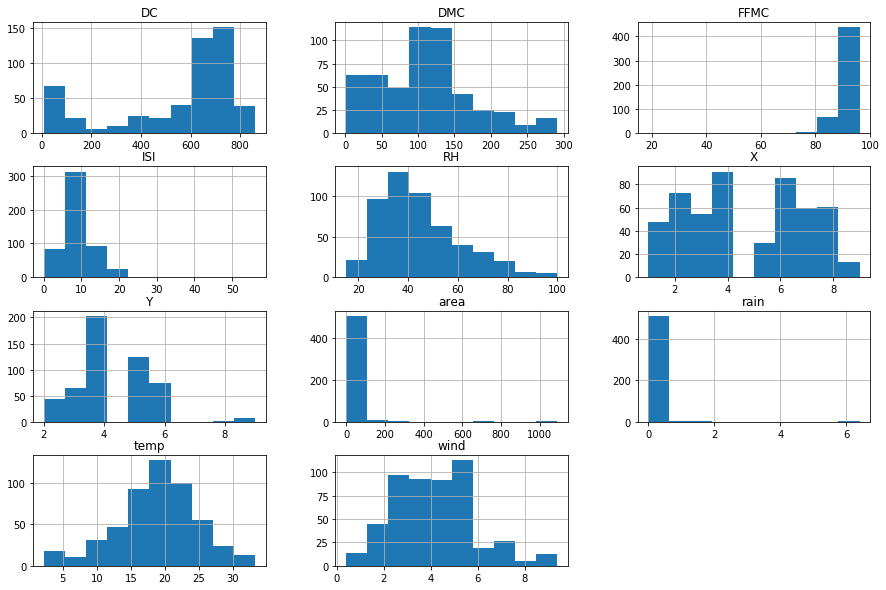

In [7]:
dataset.hist(figsize=(15,10))
plt.show()

#### 2.3.4 Box plot

Box plots are a very compact and effective representation of data distributions. They can visualize a summary of important statistical numbers and also highlight possible outliers. A more detailed description of the representation method is shown in the following image:

<img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png" alt="boxplot" style="width:50%;" />

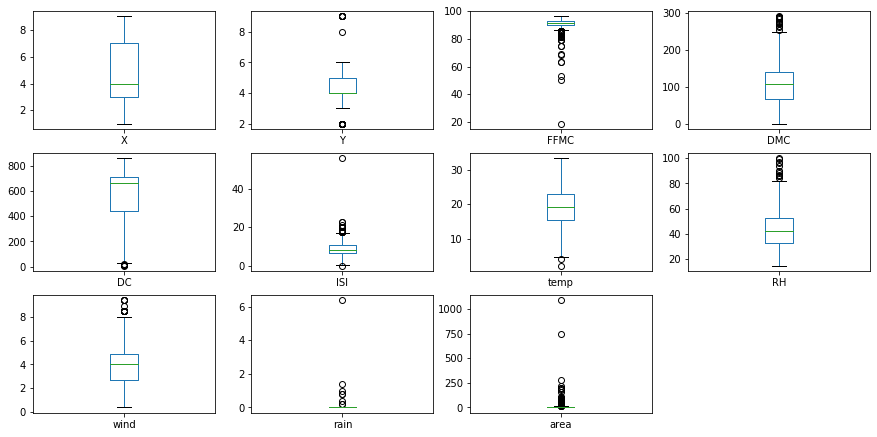

In [8]:
dataset.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10), sharex=False, sharey=False)
plt.show()

### 2.5 Correletion Matrix

#### 2.5.1 Pre-Processing the dataset for the correletion matrix 

Descrizione 1-to-C encoding.

In [9]:
dataset['day'] = pd.Categorical(dataset['day'])
dataset['month'] = pd.Categorical(dataset['month'])

day_dummies = pd.get_dummies(dataset['day'], prefix="day")
month_dummies = pd.get_dummies(dataset['month'], prefix="month")

dataset = dataset.drop(['day', 'month'], axis=1)
dataset = pd.concat([dataset, day_dummies, month_dummies], axis=1)

In [10]:
dataset.head(5)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0


### 3.2 Correletion matrix definition

Descrivere correletion matrix con formule e la differenza con la cov matrix.
https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22

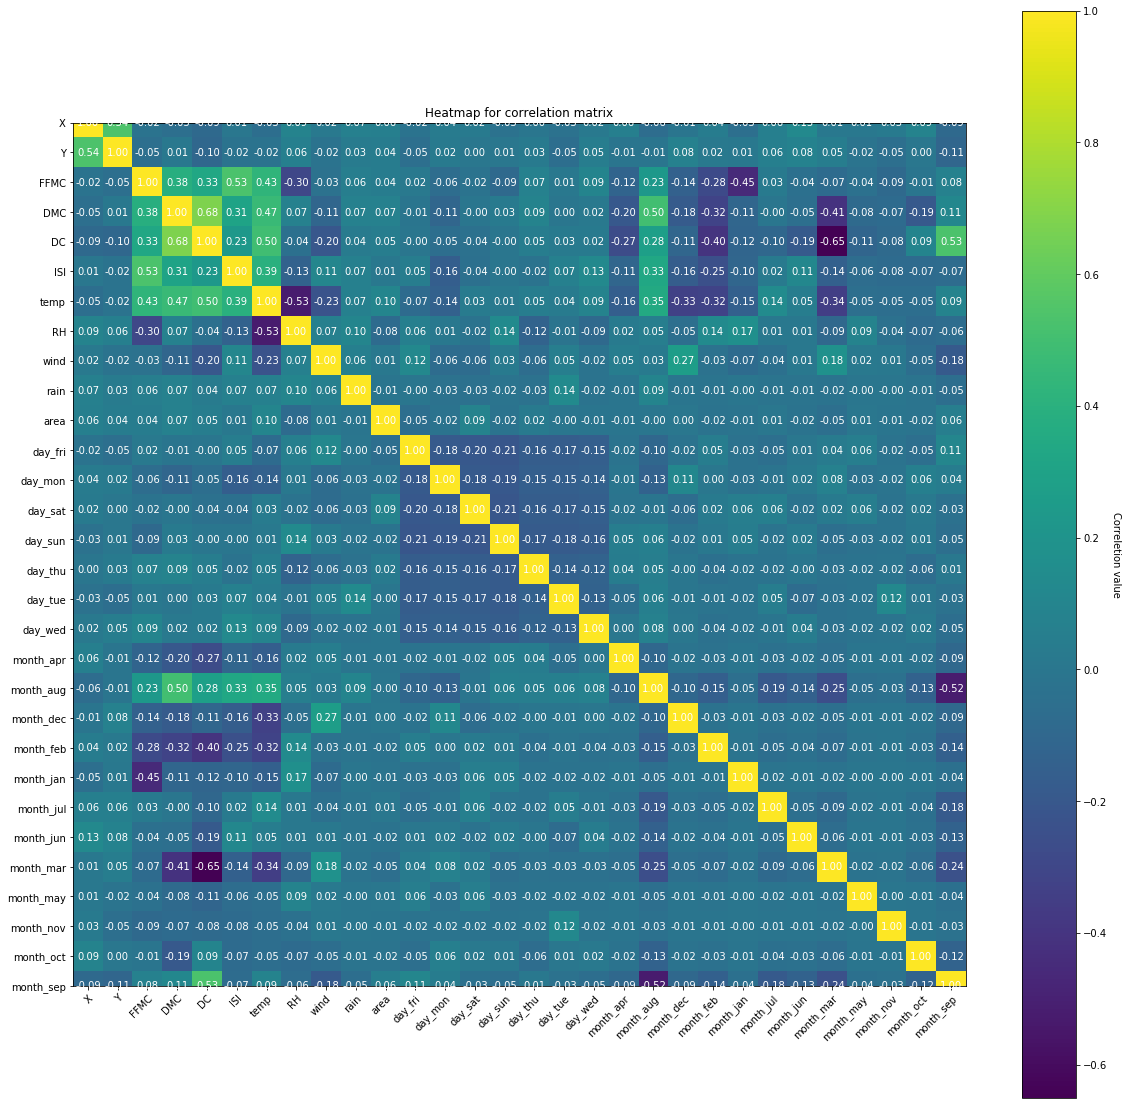

In [22]:
correlations = dataset.corr()
fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(correlations)
ax.set_xticks(np.arange(dataset.shape[1]))
ax.set_yticks(np.arange(dataset.shape[1]))
# label them with the respective list entries
ax.set_xticklabels(list(dataset.columns))
ax.set_yticklabels(list(dataset.columns))

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(dataset.shape[1]):
    for j in range(dataset.shape[1]):
        text = ax.text(j, i, "{0:.2f}".format(correlations.iloc[i, j]), ha="center", va="center", color="w")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correletion value", rotation=-90, va="bottom")

ax.set_title("Heatmap for correlation matrix")
plt.show()


The correlation matrix, in more detail, is reported below.

In [23]:
correlations

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,...,-0.006547,0.041721,-0.045002,0.061062,0.129616,0.007827,0.008917,0.025344,0.089545,-0.087216
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,...,0.075850,0.016358,0.010153,0.061449,0.078594,0.050495,-0.015206,-0.046570,0.004717,-0.105465
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733


### 2.6 Target analysis

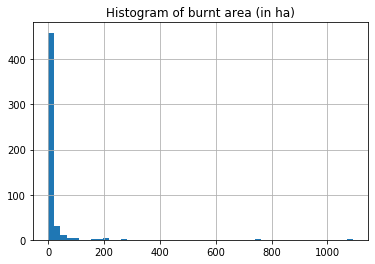

In [24]:
dataset['area'].hist(bins=50)
plt.title('Histogram of burnt area (in ha)')
plt.show()

Burnt area is very skewed, with the majority of the fires presenting a small size. The logarithm function can be applied to reduce skewness and improve symmetry. More precisely, ln(x+1) transform can be applied and model prediction will need to be post-processed with the inverse transformation.

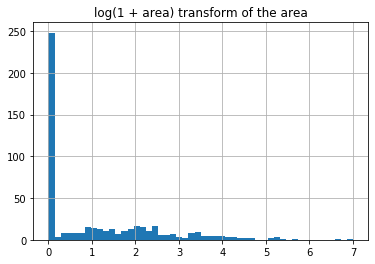

In [25]:
dataset['area'] = np.log1p(dataset['area'])
dataset['area'].hist(bins=50)
plt.title('log(1 + area) transform of the area')
plt.show()

___________________________________________________________________________________________

## 3. Pre-Processing

### 3.1 Division of prediction features

The first thing to do is to divide the column representing the target from the rest of the columns.
The target value is used to perform the learning of the model and also the test on it. In our dataset, the target value is represented by the area feature.

In [26]:
dataFrame = dataset
dataset = dataset.values

X = dataset[:,0:12]
Y = dataset[:,12]

### 3.2 Dataset partition

During the study of the various models we must understand how the newly generated models can perform on data they have never seen.
To do this, you can divide the dataset into two parts:
- Training set: is the set where our model goes to learn;
- Test set: is the part of dataset where we can evaluate our models. 

To do this we have to define which parameter is best for splitting the trainset and the test set. One possible solution is to take a set of values (which is the split proportion) and try them with the algorithms that we are going to use on our training set. We will choose the proportion that will give a better result on the test.
So we are going to define a function that will allow you to create the split and at the same time will carry out normalization.

The division is implemented using the train_test_split function which, given a proportion of tests compared to that of training, returns the divided dataset.

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30, random_state=0)

print("The size of the training set is:", len(X_train))
print("The size of the test set is:", len(X_test))

The size of the training set is: 361
The size of the test set is: 156


### 3.3 Normalization

Normalization is a type of data transformation, whose values are adapted into a smaller range of numeric values, typically a range between [-1, 1] or [0, 1] is used. They are used in attributes to have the same reference scale because it is useful in the concept of distance.
In this case the z-score transformation can be chosen and it is defined as:
\begin{equation*}
z = \frac{X - μ}{σ}
\end{equation*}

Using the SandardScaler class, we can calculate the transformation using the fit method on the training set (result of the division of the previous step) and then apply the changes on the training set and test set.

In [28]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Pre-compute post-processed Ys
Y_train_post = np.expm1(Y_train)
Y_test_post = np.expm1(Y_test)

### 3.4 Definition of function for split and normalization

Spiegare post processed Ys.

In [ ]:
def createSplit(X, Y, test_size):
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=test_size, random_state=0)

    print("The size of the training set is:", len(X_train))
    print("The size of the test set is:", len(X_test))
    scaler = StandardScaler()
    # Fit on training set only.
    scaler.fit(X_train)
    # Apply transform to both the training set and the test set.
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    # Pre-compute post-processed Ys
    Y_train_post = np.expm1(Y_train)
    Y_test_post = np.expm1(Y_test)
    return X_train, X_test, Y_train, Y_test, Y_train_post, Y_test_post

____________________________________________________________________

## 3. Definition of functions

### 3.1 PCA

In [29]:
def plotPCACumulativeExplainedVariance(pca):
    plt.bar(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color='orange')
    plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
    plt.title('Explained variance by different principal components')
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance in percent');

In [30]:
def makePCA(X_train_, X_test_):
    pca = PCA(n_components=.95)
    pca.fit(X_train_)
    X_train_pca = pca.transform(X_train_)
    X_test_pca = pca.transform(X_test_)
    plotPCACumulativeExplainedVariance(pca)
    return X_train_pca, X_test_pca

Apply the mapping between the old representetion and the new representation.

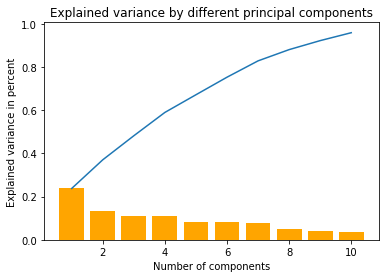

In [31]:
X_train_pca, X_test_pca = makePCA(X_train, X_test)

### 3.2 Linear regression 

In [32]:
def makeLinearRegression(X_train_, Y_train_, Y_train_post_, X_test_, Y_test_post_):
    model = LinearRegression()
    model.fit(X_train_, Y_train_)
    
    Y_predict = model.predict(X_test_)
    # Post-processing
    Y_predict_post = np.expm1(Y_predict)   
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_post_, Y_predict_post))
    
    Y_predict_train = model.predict(X_train_)
    # Post-processing
    Y_predict_train_post = np.expm1(Y_predict_train)    
    print("Train results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_post_, Y_predict_train_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_post_, Y_predict_train_post))
    
    return np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)), metrics.mean_absolute_error(Y_test_post_, Y_predict_post)

**With PCA:**

In [33]:
lr_pca_RMSE, lr_pca_MAE = makeLinearRegression(X_train_pca, Y_train, Y_train_post, X_test_pca, Y_test_post)

Test results:
	RMSE: 0.5181796128052716
	MAE: 0.30927555903859616
Train results:
	RMSE: 0.6141394054655803
	MAE: 0.3781998792158894


**Without PCA:**

In [34]:
lr_RMSE, lr_MAE = makeLinearRegression(X_train, Y_train, Y_train_post, X_test, Y_test_post)

Test results:
	RMSE: 0.5151855381752348
	MAE: 0.3072743252284218
Train results:
	RMSE: 0.6137948297114136
	MAE: 0.37786157321377617


The prediction of the model with PCA is better then the result of the model without PCA.

### 3.3 Decision Tree Regression

In [35]:
def makeDecisionTree(X_train_, Y_train_, Y_train_post_, X_test_, Y_test_post_):
    decisionTree = GridSearchCV(estimator=DecisionTreeRegressor(),
                                param_grid={'max_depth': [1, 2, 3, 5, 10, 15, 20], 'criterion': ["mse", "friedman_mse", "mae"]},
                                cv=10, iid=False)
    decisionTree.fit(X_train_, Y_train_)
    
    Y_predict = decisionTree.predict(X_test_)
    # Post-processing
    Y_predict_post = np.expm1(Y_predict)   
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_post_, Y_predict_post))
    
    Y_predict_train = decisionTree.predict(X_train_)
    # Post-processing
    Y_predict_train_post = np.expm1(Y_predict_train)    
    print("Train results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_post_, Y_predict_train_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_post_, Y_predict_train_post))
    
    tree.plot_tree(decisionTree.best_estimator_)
    
    return np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)), metrics.mean_absolute_error(Y_test_post_, Y_predict_post)

**With PCA:**

Test results:
	RMSE: 0.5699069078732664
	MAE: 0.3345150341515181
Train results:
	RMSE: 0.6198714872737909
	MAE: 0.36977640570506365


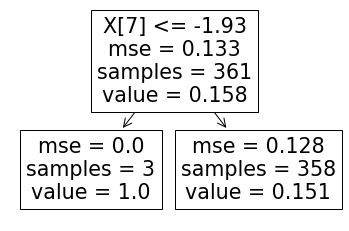

In [36]:
dt_pca_RMSE, dt_pca_MAE = makeDecisionTree(X_train_pca, Y_train, Y_train_post, X_test_pca, Y_test_post)

**Without PCA:**

Test results:
	RMSE: 0.5738112853478781
	MAE: 0.327845962822419
Train results:
	RMSE: 0.5759341346360232
	MAE: 0.3281481269690429


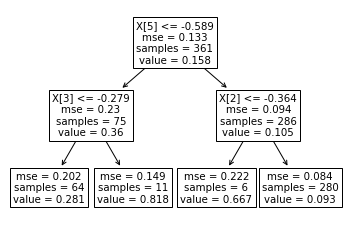

In [37]:
dt_RMSE, dt_MAE = makeDecisionTree(X_train, Y_train, Y_train_post, X_test, Y_test_post)

### 3.4 Random forest

In [38]:
def makeRandomForest(X_train_, Y_train_, Y_train_post_, X_test_, Y_test_post_):
    randomForest = GridSearchCV(estimator=RandomForestRegressor(n_estimators=100),
                                param_grid={'max_depth': [1, 2, 3, 5, 10, 15, 20], 'criterion': ["mse", "mae"]},
                                cv=10, iid=False, n_jobs=-1)
    randomForest.fit(X_train_, Y_train_)
    
    Y_predict = randomForest.predict(X_test_)
    # Post-processing
    Y_predict_post = np.expm1(Y_predict)   
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_post_, Y_predict_post))
    
    Y_predict_train = randomForest.predict(X_train_)
    # Post-processing
    Y_predict_train_post = np.expm1(Y_predict_train)    
    print("Train results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_post_, Y_predict_train_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_post_, Y_predict_train_post))
    
    return np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)), metrics.mean_absolute_error(Y_test_post_, Y_predict_post)

**With PCA:**

In [39]:
rf_pca_RMSE, rf_pca_MAE = makeRandomForest(X_train_pca, Y_train, Y_train_post, X_test_pca, Y_test_post)

Test results:
	RMSE: 0.5248793226653071
	MAE: 0.30329440186206574
Train results:
	RMSE: 0.5555483869008225
	MAE: 0.3246864178218396


**Without PCA:**

In [40]:
rf_RMSE, rf_MAE = makeRandomForest(X_train, Y_train, Y_train_post, X_test, Y_test_post)

Test results:
	RMSE: 0.44674897900591903
	MAE: 0.2524576443091679
Train results:
	RMSE: 0.24135380694193448
	MAE: 0.12931024091177548


### 3.5 SVR

In [41]:
def makeSVR(X_train_, Y_train_, Y_train_post_, X_test_, Y_test_post_):
    svr = GridSearchCV(estimator=SVR(),
                                param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf'], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                                cv=10, iid=False, verbose=1, n_jobs=-1)
    svr.fit(X_train_, Y_train_)
    
    print("Best parameters: ", svr.best_params_)
    Y_predict = svr.predict(X_test_)
    # Post-processing
    Y_predict_post = np.expm1(Y_predict)   
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_post_, Y_predict_post))
    
    Y_predict_train = svr.predict(X_train_)
    # Post-processing
    Y_predict_train_post = np.expm1(Y_predict_train)    
    print("Train results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_post_, Y_predict_train_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_post_, Y_predict_train_post))
    
    return np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)), metrics.mean_absolute_error(Y_test_post_, Y_predict_post)

**With PCA:**

In [42]:
svr_pca_RMSE, svr_pca_MAE = makeSVR(X_train_pca, Y_train, Y_train_post, X_test_pca, Y_test_post)

Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 604 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 152.5min finished


NameError: name 'best_params_' is not defined

**Without PCA:**

In [ ]:
svr_RMSE, svr_MAE = makeSVR(X_train, Y_train, Y_train_post, X_test, Y_test_post)

### 3.6 K-NN

In [ ]:
def makeKNN(X_train_, Y_train_, Y_train_post_, X_test_, Y_test_post_):
    knn = GridSearchCV(estimator=KNeighborsRegressor(),
                                param_grid={'n_neighbors': [1, 3, 5, 7, 9, 13, 15, 17, 19], 'p': [1, 2]},
                                cv=10, iid=False, verbose=1, n_jobs=-1)
    knn.fit(X_train_, Y_train_)
    
    Y_predict = knn.predict(X_test_)
    # Post-processing
    Y_predict_post = np.expm1(Y_predict)   
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_post_, Y_predict_post))
    
    Y_predict_train = knn.predict(X_train_)
    # Post-processing
    Y_predict_train_post = np.expm1(Y_predict_train)    
    print("Train results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_post_, Y_predict_train_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_post_, Y_predict_train_post))
    
    return np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)), metrics.mean_absolute_error(Y_test_post_, Y_predict_post)

**With PCA:**

In [ ]:
knn_pca_RMSE, knn_pca_MAE = makeKNN(X_train_pca, Y_train, Y_train_post, X_test_pca, Y_test_post)

**Without PCA:**

In [ ]:
knn_RMSE, knn_MAE = makeKNN(X_train, Y_train, Y_train_post, X_test, Y_test_post)

## 3.7 Results

### 3.7.1 PCA Results

In [ ]:
def plotResult(RMSEs, MAEs):    
    x = np.arange(5)
    fig, ax = plt.subplots(figsize=(8,5))
    plt.title('RMSE results')
    plt.bar(x, RMSEs, color='orange')
    plt.xticks(x, ('Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'K-NN'))
    plt.ylim(80, 100)
    plt.show()
 
    x = np.arange(5)
    fig, ax = plt.subplots(figsize=(8,5))
    plt.title('MAE results')
    plt.bar(x, MAEs, color='red')
    plt.xticks(x, ('Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'K-NN'))
    plt.ylim(8, 20)
    plt.show()

In [ ]:
RMSEs = [lr_pca_RMSE, dt_pca_RMSE, rf_pca_RMSE, svr_pca_RMSE, knn_pca_RMSE] 
MAEs = [lr_pca_MAE, dt_pca_MAE, rf_pca_MAE, svr_pca_MAE, knn_pca_MAE]
plotResult(RMSEs, MAEs)

### 3.7.2 Results

In [ ]:
RMSEs = [lr_RMSE, dt_RMSE, rf_RMSE, svr_RMSE, knn_RMSE]  
MAEs = [lr_MAE, dt_MAE, rf_MAE, svr_MAE, knn_MAE]
plotResult(RMSEs, MAEs)

___________________________________________________________________________________________________________________

## 4. Features selection

### 4.1 STFWI 

STFWI – using spatial, temporal and the four FWI components:
- X
- Y
- month
- day 
- FFMC
- DMC
- DC
- ISI

In [38]:
dataset_STFWI = dataFrame[['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'area']].values

X_STFWI = dataset_STFWI[:,0:8]
Y_STFWI = dataset_STFWI[:,8]

In [39]:
X_train_STFWI, X_test_STFWI, Y_train_STFWI, Y_test_STFWI = train_test_split( X_STFWI, Y_STFWI, test_size=0.30, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_STFWI)
# Apply transform to both the training set and the test set.
X_train_STFWI = scaler.transform(X_train_STFWI)
X_test_STFWI = scaler.transform(X_test_STFWI)
# Pre-compute post-processed Ys
Y_train_STFWI_post = np.expm1(Y_train_STFWI)
Y_test_STFWI_post = np.expm1(Y_test_STFWI)

**PCA**

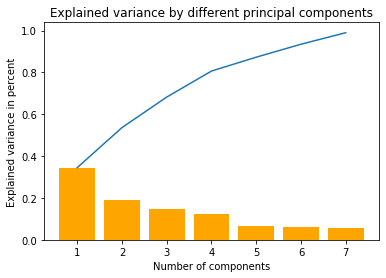

In [40]:
X_train_pca_STFWI, X_test_pca_STFWI = makePCA(X_train_STFWI, X_test_STFWI)

**Linear Regression**

In [41]:
print("With PCA:")
lr_pca_RMSE_STFWI, lr_pca_MAE_STFWI = makeLinearRegression(X_train_pca_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_pca_STFWI, Y_test_STFWI_post)
print("Without PCA:")
lr_RMSE_STFWI, lr_MAE_STFWI = makeLinearRegression(X_train_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_STFWI, Y_test_STFWI_post)

With PCA:
Test results:
	RMSE: 92.15231959691837
	MAE: 18.183883622529876
Train results:
	RMSE: 47.8447561776468
	MAE: 10.652389035865474
Without PCA:
Test results:
	RMSE: 92.14872535418829
	MAE: 18.14485406946338
Train results:
	RMSE: 47.8048853001324
	MAE: 10.571914996357917


**Decison Tree**

With PCA:
Test results:
	RMSE: 92.2143660081423
	MAE: 18.43321492814176
Train results:
	RMSE: 47.33791131841648
	MAE: 10.694396270828658
Without PCA:
Test results:
	RMSE: 92.18389378400633
	MAE: 18.08654826130131
Train results:
	RMSE: 47.88474960902027
	MAE: 10.525604381474567


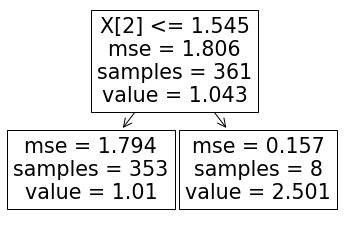

In [42]:
print("With PCA:")
dt_pca_RMSE_STFWI, dt_pca_MAE_STFWI = makeDecisionTree(X_train_pca_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_pca_STFWI, Y_test_STFWI_post)
print("Without PCA:")
dt_RMSE_STFWI, dt_MAE_STFWI = makeDecisionTree(X_train_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_STFWI, Y_test_STFWI_post)

**Random forest**

In [43]:
print("With PCA:")
rf_pca_RMSE_STFWI, rf_pca_MAE_STFWI = makeRandomForest(X_train_pca_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_pca_STFWI, Y_test_STFWI_post)
print("Without PCA:")
rf_RMSE_STFWI, rf_MAE_STFWI = makeRandomForest(X_train_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_STFWI, Y_test_STFWI_post)

With PCA:
Test results:
	RMSE: 92.19580838802987
	MAE: 18.212279551795785
Train results:
	RMSE: 47.6619148315365
	MAE: 10.648583009571682
Without PCA:
Test results:
	RMSE: 92.17730050144701
	MAE: 18.154990018542787
Train results:
	RMSE: 47.86518019883842
	MAE: 10.605870381232014


**SVR**

In [44]:
print("With PCA:")
svr_pca_RMSE_STFWI, svr_pca_MAE_STFWI = makeSVR(X_train_pca_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_pca_STFWI, Y_test_STFWI_post)
print("Without PCA:")
svr_RMSE_STFWI, svr_MAE_STFWI = makeSVR(X_train_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_STFWI, Y_test_STFWI_post)

With PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 6348 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 14.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Test results:
	RMSE: 92.20099544628088
	MAE: 18.166529043191797
Train results:
	RMSE: 47.89585938907642
	MAE: 10.60986061243626
Without PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 6201 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 6457 tasks      | elapsed:  7.5min


Test results:
	RMSE: 92.19384625019862
	MAE: 18.155785016652754
Train results:
	RMSE: 47.892024556310815
	MAE: 10.586804821248226


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed:  8.0min finished


**K-NN**

In [45]:
print("With PCA:")
knn_pca_RMSE_STFWI, knn_pca_MAE_STFWI = makeKNN(X_train_pca_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_pca_STFWI, Y_test_STFWI_post)
print("Without PCA:")
knn_RMSE_STFWI, knn_MAE_STFWI = makeKNN(X_train_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_STFWI, Y_test_STFWI_post)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


With PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Test results:
	RMSE: 92.12239345158982
	MAE: 18.26807193955461
Train results:
	RMSE: 47.74962246644228
	MAE: 10.553614916170277
Without PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Test results:
	RMSE: 92.13983890723144
	MAE: 18.28545122659759
Train results:
	RMSE: 47.7401560992086
	MAE: 10.522262812995741


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.1s finished


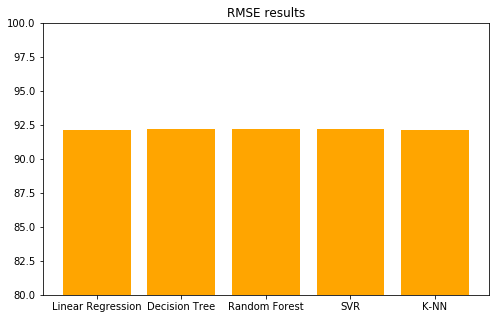

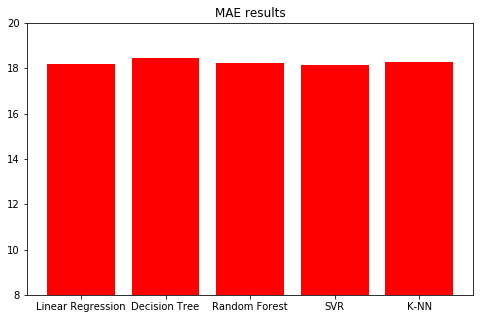

In [84]:
# result with PCA
RMSEs = [lr_pca_RMSE_STFWI, dt_pca_RMSE_STFWI, rf_pca_RMSE_STFWI, svr_pca_RMSE_STFWI, knn_pca_RMSE_STFWI] 
MAEs = [lr_pca_MAE_STFWI, dt_pca_MAE_STFWI, rf_pca_MAE_STFWI, svr_pca_MAE_STFWI, knn_pca_MAE_STFWI]
plotResult(RMSEs, MAEs)

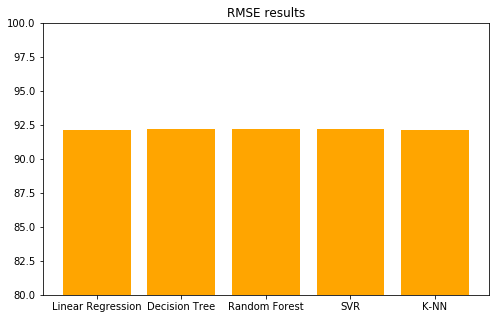

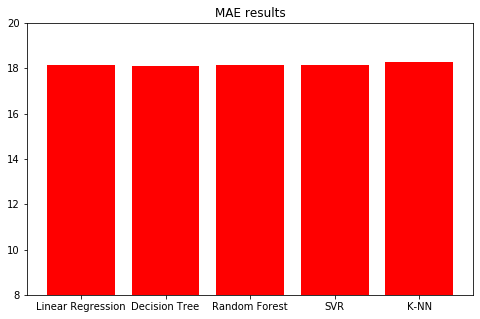

In [85]:
# result
RMSEs = [lr_RMSE_STFWI, dt_RMSE_STFWI, rf_RMSE_STFWI, svr_RMSE_STFWI, knn_RMSE_STFWI]  
MAEs = [lr_MAE_STFWI, dt_MAE_STFWI, rf_MAE_STFWI, svr_MAE_STFWI, knn_MAE_STFWI]
plotResult(RMSEs, MAEs)

### 4.2 STM

STM – with the spatial, temporal and four weather variables:
- X
- Y
- month
- day 
- temp
- RH
- wind
- rain

In [48]:
dataset_STM = dataFrame[['X', 'Y', 'month', 'day', 'temp', 'RH', 'wind', 'rain', 'area']].values

X_STM = dataset_STM[:,0:8]
Y_STM = dataset_STM[:,8]

In [49]:
X_train_STM, X_test_STM, Y_train_STM, Y_test_STM = train_test_split( X_STM, Y_STM, test_size=0.30, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_STM)
# Apply transform to both the training set and the test set.
X_train_STM = scaler.transform(X_train_STM)
X_test_STM = scaler.transform(X_test_STM)
# Pre-compute post-processed Ys
Y_train_STM_post = np.expm1(Y_train_STM)
Y_test_STM_post = np.expm1(Y_test_STM)

**PCA**

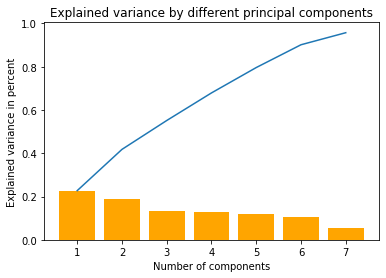

In [50]:
X_train_pca_STM, X_test_pca_STM = makePCA(X_train_STM, X_test_STM)

**Linear Regression**

In [51]:
print("With PCA:")
lr_pca_RMSE_STM, lr_pca_MAE_STM = makeLinearRegression(X_train_pca_STM, Y_train_STM, Y_train_STM_post, X_test_pca_STM, Y_test_STM_post)
print("Without PCA:")
lr_RMSE_STM, lr_MAE_STM = makeLinearRegression(X_train_STM, Y_train_STM, Y_train_STM_post, X_test_STM, Y_test_STM_post)

With PCA:
Test results:
	RMSE: 92.15151106201495
	MAE: 18.150017655101664
Train results:
	RMSE: 47.82321464276788
	MAE: 10.624137658613316
Without PCA:
Test results:
	RMSE: 92.14652678370939
	MAE: 18.163785474075006
Train results:
	RMSE: 47.837950727764095
	MAE: 10.58670266619195


**Decision Tree**

With PCA:
Test results:
	RMSE: 92.18389378400633
	MAE: 18.08654826130131
Train results:
	RMSE: 47.88474960902027
	MAE: 10.525604381474567
Without PCA:
Test results:
	RMSE: 92.19426376330951
	MAE: 18.14409775782571
Train results:
	RMSE: 47.88401023866265
	MAE: 10.509331374642663


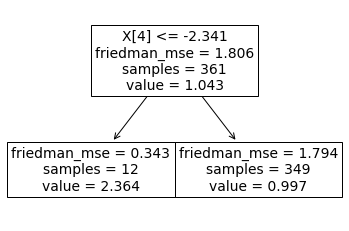

In [52]:
print("With PCA:")
dt_pca_RMSE_STM, dt_pca_MAE_STM = makeDecisionTree(X_train_pca_STM, Y_train_STM, Y_train_STM_post, X_test_pca_STM, Y_test_STM_post)
print("Without PCA:")
dt_RMSE_STM, dt_MAE_STM = makeDecisionTree(X_train_STM, Y_train_STM, Y_train_STM_post, X_test_STM, Y_test_STM_post)

**Random Forest**

In [53]:
print("With PCA:")
rf_pca_RMSE_STM, rf_pca_MAE_STM = makeRandomForest(X_train_pca_STM, Y_train_STM, Y_train_STM_post, X_test_pca_STM, Y_test_STM_post)
print("Without PCA:")
rf_RMSE_STM, rf_MAE_STM = makeRandomForest(X_train_STM, Y_train_STM, Y_train_STM_post, X_test_STM, Y_test_STM_post)

With PCA:
Test results:
	RMSE: 92.18865653383392
	MAE: 18.154254787938
Train results:
	RMSE: 47.83281341299376
	MAE: 10.605622350919308
Without PCA:
Test results:
	RMSE: 92.17759920287023
	MAE: 18.12480120147634
Train results:
	RMSE: 47.86114844958123
	MAE: 10.574591987436612


**SVR**

In [54]:
print("With PCA:")
svr_pca_RMSE_STM, svr_pca_MAE_STM = makeSVR(X_train_pca_STM, Y_train_STM, Y_train_STM_post, X_test_pca_STM, Y_test_STM_post)
print("Without PCA:")
svr_RMSE_STM, svr_MAE_STM = makeSVR(X_train_STM, Y_train_STM, Y_train_STM_post, X_test_STM, Y_test_STM_post)

With PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 5524 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 6304 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 6845 out of 6860 | elapsed: 11.9min remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 12.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Test results:
	RMSE: 92.1748998902858
	MAE: 18.14780825228582
Train results:
	RMSE: 47.845510814692545
	MAE: 10.483017096132736
Without PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 6418 tasks      | elapsed: 12.3min


Test results:
	RMSE: 92.19292759240147
	MAE: 18.127233810711985
Train results:
	RMSE: 47.88696239916904
	MAE: 10.569444772719228


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 17.9min finished


**K-NN**

In [55]:
print("With PCA:")
knn_pca_RMSE_STM, knn_pca_MAE_STM = makeKNN(X_train_pca_STM, Y_train_STM, Y_train_STM_post, X_test_pca_STM, Y_test_STM_post)
print("Without PCA:")
knn_RMSE_STM, knn_MAE_STM = makeKNN(X_train_STM, Y_train_STM, Y_train_STM_post, X_test_STM, Y_test_STM_post)

With PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Test results:
	RMSE: 92.18852719962838
	MAE: 18.28458871661289
Train results:
	RMSE: 47.7608647058054
	MAE: 10.562987456863747
Without PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Test results:
	RMSE: 92.21228082868895
	MAE: 18.2771106418396
Train results:
	RMSE: 47.7724179299934
	MAE: 10.541827883021154


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.6s finished


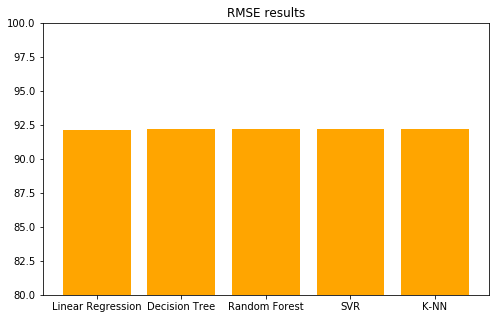

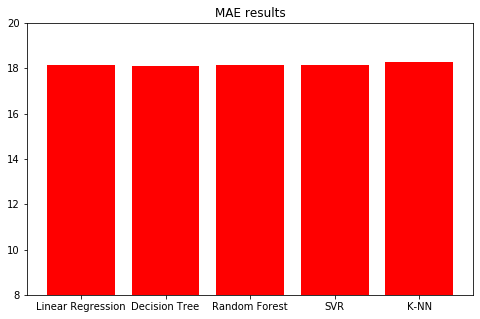

In [86]:
# result with PCA
RMSEs = [lr_pca_RMSE_STM, dt_pca_RMSE_STM, rf_pca_RMSE_STM, svr_pca_RMSE_STM, knn_pca_RMSE_STM] 
MAEs = [lr_pca_MAE_STM, dt_pca_MAE_STM, rf_pca_MAE_STM, svr_pca_MAE_STM, knn_pca_MAE_STM]
plotResult(RMSEs, MAEs)

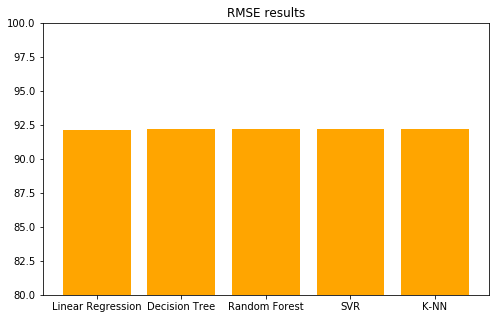

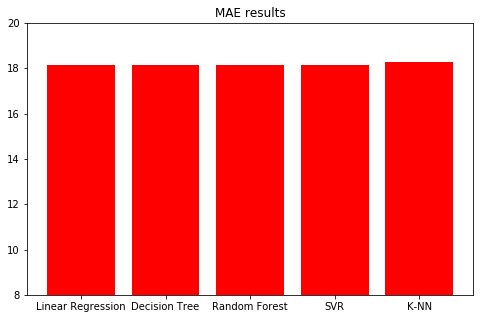

In [87]:
# result
RMSEs = [lr_RMSE_STM, dt_RMSE_STM, rf_RMSE_STM, svr_RMSE_STM, knn_RMSE_STM]  
MAEs = [lr_MAE_STM, dt_MAE_STM, rf_MAE_STM, svr_MAE_STM, knn_MAE_STM]
plotResult(RMSEs, MAEs)

### 4.3 FWI

FWI – using only the four FWI components:
- FFMC
- DMC
- DC
- ISI

In [58]:
dataset_FWI = dataFrame[['FFMC', 'DMC', 'DC', 'ISI', 'area']].values

X_FWI = dataset_FWI[:,0:4]
Y_FWI = dataset_FWI[:,4]

In [59]:
X_train_FWI, X_test_FWI, Y_train_FWI, Y_test_FWI = train_test_split( X_FWI, Y_FWI, test_size=0.30, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_FWI)
# Apply transform to both the training set and the test set.
X_train_FWI = scaler.transform(X_train_FWI)
X_test_FWI = scaler.transform(X_test_FWI)
# Pre-compute post-processed Ys
Y_train_FWI_post = np.expm1(Y_train_FWI)
Y_test_FWI_post = np.expm1(Y_test_FWI)

**PCA**

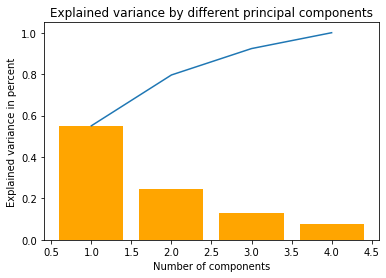

In [60]:
X_train_pca_FWI, X_test_pca_FWI = makePCA(X_train_FWI, X_test_FWI)

**Linear Regression**

In [61]:
print("With PCA:")
lr_pca_RMSE_FWI, lr_pca_MAE_FWI = makeLinearRegression(X_train_pca_FWI, Y_train_FWI, Y_train_FWI_post, X_test_pca_FWI, Y_test_FWI_post)
print("Without PCA:")
lr_RMSE_FWI, lr_MAE_FWI = makeLinearRegression(X_train_FWI, Y_train_FWI, Y_train_FWI_post, X_test_FWI, Y_test_FWI_post)

With PCA:
Test results:
	RMSE: 92.17489502021802
	MAE: 18.144522474100455
Train results:
	RMSE: 47.8887552767897
	MAE: 10.688915710763094
Without PCA:
Test results:
	RMSE: 92.17489502021802
	MAE: 18.144522474100455
Train results:
	RMSE: 47.8887552767897
	MAE: 10.688915710763094


**Decision Tree**

With PCA:
Test results:
	RMSE: 92.14956367149783
	MAE: 18.13026568458973
Train results:
	RMSE: 47.871110936617406
	MAE: 10.66276321301827
Without PCA:
Test results:
	RMSE: 92.1912625072396
	MAE: 18.21160155298063
Train results:
	RMSE: 47.895622555763
	MAE: 10.66309374554394


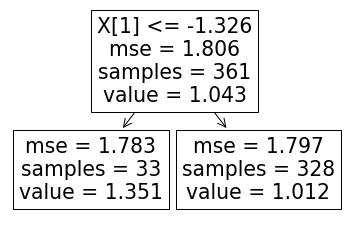

In [62]:
print("With PCA:")
dt_pca_RMSE_FWI, dt_pca_MAE_FWI = makeDecisionTree(X_train_pca_FWI, Y_train_FWI, Y_train_FWI_post, X_test_pca_FWI, Y_test_FWI_post)
print("Without PCA:")
dt_RMSE_FWI, dt_MAE_FWI = makeDecisionTree(X_train_FWI, Y_train_FWI, Y_train_FWI_post, X_test_FWI, Y_test_FWI_post)

**Random Forest**

In [63]:
print("With PCA:")
rf_pca_RMSE_FWI, rf_pca_MAE_FWI = makeRandomForest(X_train_pca_FWI, Y_train_FWI, Y_train_FWI_post, X_test_pca_FWI, Y_test_FWI_post)
print("Without PCA:")
rf_RMSE_FWI, rf_MAE_FWI = makeRandomForest(X_train_FWI, Y_train_FWI, Y_train_FWI_post, X_test_FWI, Y_test_FWI_post)

With PCA:
Test results:
	RMSE: 92.17651887832614
	MAE: 18.167028504030803
Train results:
	RMSE: 47.83309132814083
	MAE: 10.659472112398586
Without PCA:
Test results:
	RMSE: 92.19024343254479
	MAE: 18.168046677522245
Train results:
	RMSE: 47.87240703116289
	MAE: 10.66051564322335


**SVR**

In [88]:
print("With PCA:")
svr_pca_RMSE_FWI, svr_pca_MAE_FWI = makeSVR(X_train_pca_FWI, Y_train_FWI, Y_train_FWI_post, X_test_pca_FWI, Y_test_FWI_post)
print("Without PCA:")
svr_RMSE_FWI, svr_MAE_FWI = makeSVR(X_train_FWI, Y_train_FWI, Y_train_FWI_post, X_test_FWI, Y_test_FWI_post)

With PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 5907 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 6457 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed:  9.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Test results:
	RMSE: 92.1920051208099
	MAE: 18.17890528687977
Train results:
	RMSE: 47.87627441651397
	MAE: 10.60414871550452
Without PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Done 772 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 6261 tasks      | elapsed:  1.7min


Test results:
	RMSE: 92.1920051208099
	MAE: 18.17890528687977
Train results:
	RMSE: 47.87627441651397
	MAE: 10.60414871550452


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed:  9.1min finished


**K-NN**

In [65]:
print("With PCA:")
knn_pca_RMSE_FWI, knn_pca_MAE_FWI = makeKNN(X_train_pca_FWI, Y_train_FWI, Y_train_FWI_post, X_test_pca_FWI, Y_test_FWI_post)
print("Without PCA:")
knn_RMSE_FWI, knn_MAE_FWI = makeKNN(X_train_FWI, Y_train_FWI, Y_train_FWI_post, X_test_FWI, Y_test_FWI_post)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


With PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Test results:
	RMSE: 92.17918409397562
	MAE: 18.20113608168683
Train results:
	RMSE: 47.82051508386746
	MAE: 10.565119096419474
Without PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Test results:
	RMSE: 92.12769624757304
	MAE: 18.28525649642401
Train results:
	RMSE: 47.78725171219052
	MAE: 10.565109730601439


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.1s finished


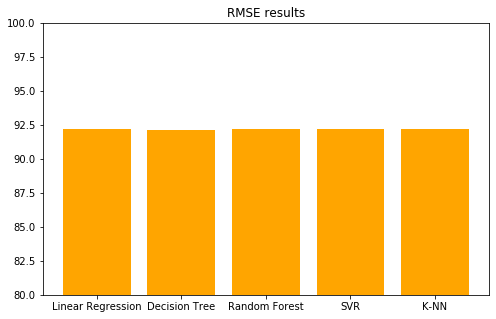

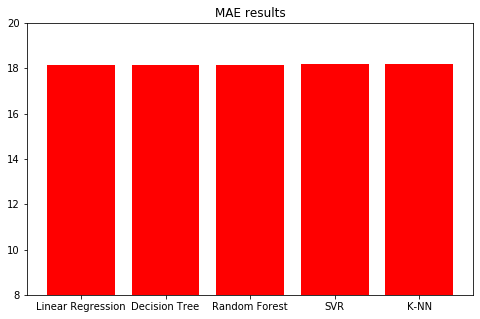

In [89]:
# result with PCA
RMSEs = [lr_pca_RMSE_FWI, dt_pca_RMSE_FWI, rf_pca_RMSE_FWI, svr_pca_RMSE_FWI, knn_pca_RMSE_FWI] 
MAEs = [lr_pca_MAE_FWI, dt_pca_MAE_FWI, rf_pca_MAE_FWI, svr_pca_MAE_FWI, knn_pca_MAE_FWI]
plotResult(RMSEs, MAEs)

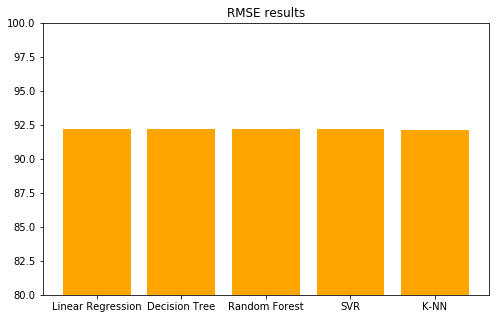

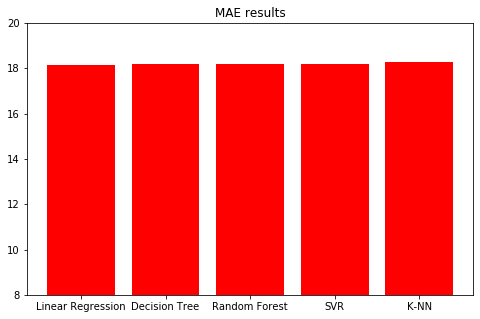

In [90]:
# result
RMSEs = [lr_RMSE_FWI, dt_RMSE_FWI, rf_RMSE_FWI, svr_RMSE_FWI, knn_RMSE_FWI]  
MAEs = [lr_MAE_FWI, dt_MAE_FWI, rf_MAE_FWI, svr_MAE_FWI, knn_MAE_FWI]
plotResult(RMSEs, MAEs)

### 4.4 Weather Conditions

M – with the four weather conditions:
- temp
- RH
- wind
- rain

In [68]:
dataset_M = dataFrame[['temp', 'RH', 'wind', 'rain', 'area']].values

X_M = dataset_M[:,0:4]
Y_M = dataset_M[:,4]

In [69]:
X_train_M, X_test_M, Y_train_M, Y_test_M = train_test_split( X_M, Y_M, test_size=0.30, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_M)
# Apply transform to both the training set and the test set.
X_train_M = scaler.transform(X_train_M)
X_test_M = scaler.transform(X_test_M)
# Pre-compute post-processed Ys
Y_train_M_post = np.expm1(Y_train_M)
Y_test_M_post = np.expm1(Y_test_M)

**PCA**

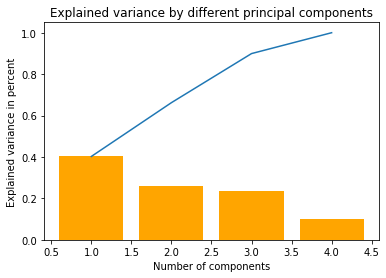

In [70]:
X_train_pca_M, X_test_pca_M = makePCA(X_train_M, X_test_M)

**Linear Regression**

In [71]:
print("With PCA:")
lr_pca_RMSE_M, lr_pca_MAE_M = makeLinearRegression(X_train_pca_M, Y_train_M, Y_train_M_post, X_test_pca_M, Y_test_M_post)
print("Without PCA:")
lr_RMSE_M, lr_MAE_M = makeLinearRegression(X_train_M, Y_train_M, Y_train_M_post, X_test_M, Y_test_M_post)

With PCA:
Test results:
	RMSE: 92.18185748622761
	MAE: 18.170104011501774
Train results:
	RMSE: 47.895799538208024
	MAE: 10.658782974931215
Without PCA:
Test results:
	RMSE: 92.18185748622761
	MAE: 18.170104011501774
Train results:
	RMSE: 47.895799538208024
	MAE: 10.658782974931215


**Decision Tree**

With PCA:
Test results:
	RMSE: 92.18186518313482
	MAE: 18.08350905767496
Train results:
	RMSE: 47.860378309211505
	MAE: 10.592566386851942
Without PCA:
Test results:
	RMSE: 92.19426376330951
	MAE: 18.144097757825705
Train results:
	RMSE: 47.88401023866265
	MAE: 10.509331374642663


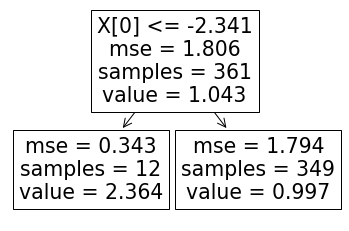

In [72]:
print("With PCA:")
dt_pca_RMSE_M, dt_pca_MAE_M = makeDecisionTree(X_train_pca_M, Y_train_M, Y_train_M_post, X_test_pca_M, Y_test_M_post)
print("Without PCA:")
dt_RMSE_M, dt_MAE_M = makeDecisionTree(X_train_M, Y_train_M, Y_train_M_post, X_test_M, Y_test_M_post)

**Random Forest**

In [73]:
print("With PCA:")
rf_pca_RMSE_M, rf_pca_MAE_M = makeRandomForest(X_train_pca_M, Y_train_M, Y_train_M_post, X_test_pca_M, Y_test_M_post)
print("Without PCA:")
rf_RMSE_M, rf_MAE_M = makeRandomForest(X_train_M, Y_train_M, Y_train_M_post, X_test_M, Y_test_M_post)

With PCA:
Test results:
	RMSE: 92.1876840215872
	MAE: 18.16032873578037
Train results:
	RMSE: 47.87351216849801
	MAE: 10.567903167924438
Without PCA:
Test results:
	RMSE: 92.18428323400462
	MAE: 18.123813346473106
Train results:
	RMSE: 47.857830273371775
	MAE: 10.560378111610792


**SVR**

In [74]:
print("With PCA:")
svr_pca_RMSE_M, svr_pca_MAE_M = makeSVR(X_train_pca_M, Y_train_M, Y_train_M_post, X_test_pca_M, Y_test_M_post)
print("Without PCA:")
svr_pca_RMSE_M, svr_pca_MAE_M = makeSVR(X_train_M, Y_train_M, Y_train_M_post, X_test_M, Y_test_M_post)

With PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 6140 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 6397 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 12.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Test results:
	RMSE: 92.19514099194917
	MAE: 18.122056061835785
Train results:
	RMSE: 47.90190981013201
	MAE: 10.615464942687447
Without PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 6379 tasks      | elapsed:  7.7min


Test results:
	RMSE: 92.19514099194913
	MAE: 18.122056061835718
Train results:
	RMSE: 47.901909810132025
	MAE: 10.615464942687417


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 12.0min finished


**K-NN**

In [75]:
print("With PCA:")
knn_pca_RMSE_M, knn_pca_MAE_M = makeKNN(X_train_pca_M, Y_train_M, Y_train_M_post, X_test_pca_M, Y_test_M_post)
print("Without PCA:")
knn_RMSE_M, knn_MAE_M =makeKNN(X_train_M, Y_train_M, Y_train_M_post, X_test_M, Y_test_M_post)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


With PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Test results:
	RMSE: 92.27783273288235
	MAE: 18.186929270532573
Train results:
	RMSE: 47.73795908470801
	MAE: 10.617567433106478
Without PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Test results:
	RMSE: 92.2322017560715
	MAE: 18.06588778938964
Train results:
	RMSE: 47.70561177734654
	MAE: 10.597588390015623


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.1s finished


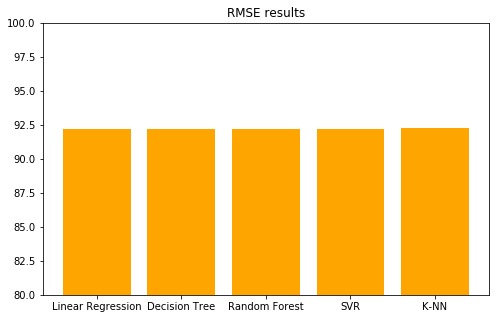

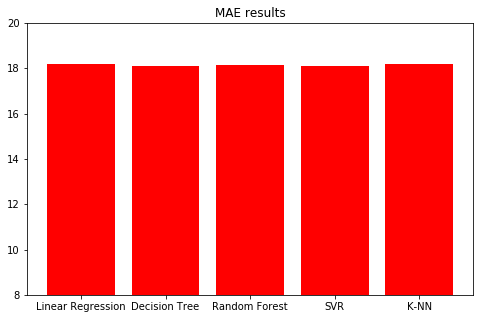

In [91]:
# result with PCA
RMSEs = [lr_pca_RMSE_M, dt_pca_RMSE_M, rf_pca_RMSE_M, svr_pca_RMSE_M, knn_pca_RMSE_M] 
MAEs = [lr_pca_MAE_M, dt_pca_MAE_M, rf_pca_MAE_M, svr_pca_MAE_M, knn_pca_MAE_M]
plotResult(RMSEs, MAEs)

In [92]:
# result
RMSEs = [lr_RMSE_M, dt_RMSE_M, rf_RMSE_M, svr_RMSE_M, knn_RMSE_M]  
MAEs = [lr_MAE_FWI, dt_MAE_M, rf_MAE_M, svr_MAE_M, knn_MAE_M]
plotResult(RMSEs, MAEs)

NameError: name 'svr_RMSE_M' is not defined

## 5. Conclusion

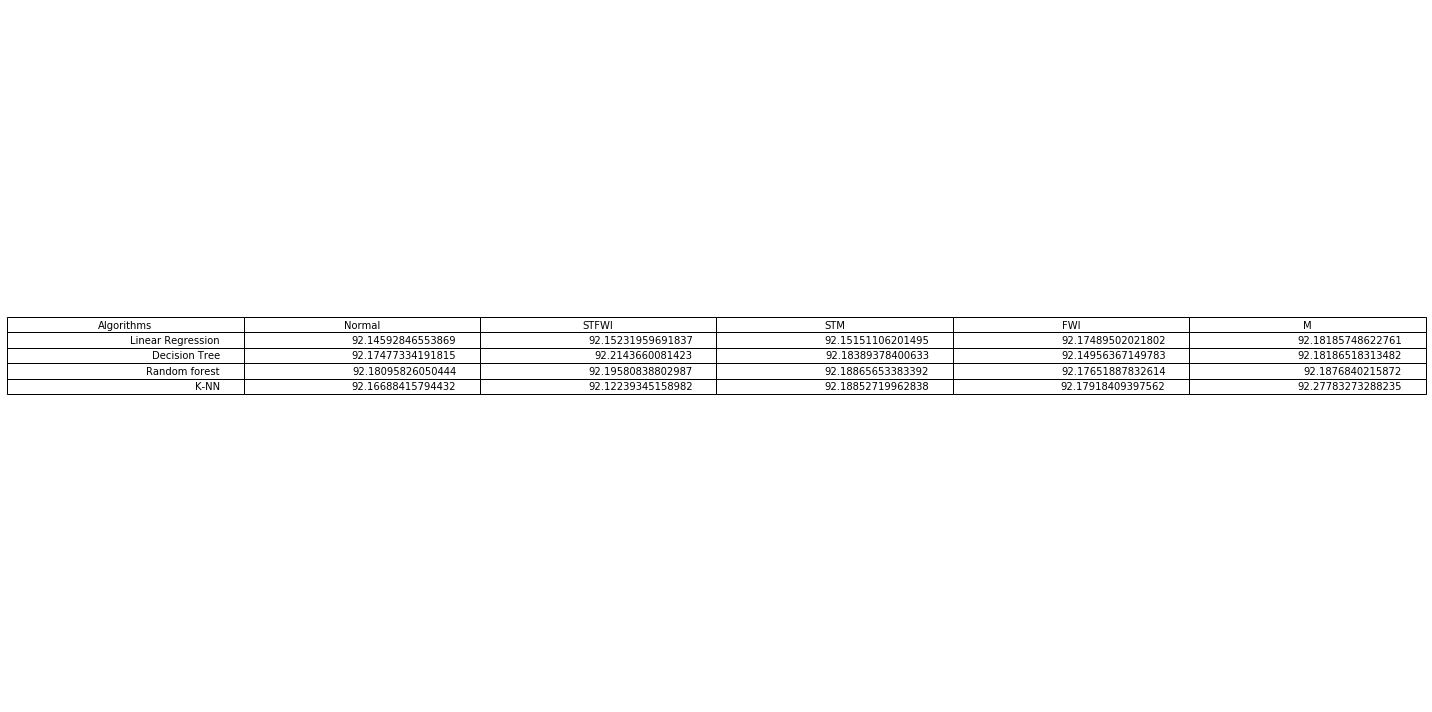

In [78]:
columns = [ 'Algorithms' ,'Normal', 'STFWI', 'STM', 'FWI', 'M']
values = [['Linear Regression', lr_pca_RMSE, lr_pca_RMSE_STFWI, lr_pca_RMSE_STM, lr_pca_RMSE_FWI, lr_pca_RMSE_M],
         ['Decision Tree', dt_pca_RMSE, dt_pca_RMSE_STFWI, dt_pca_RMSE_STM, dt_pca_RMSE_FWI, dt_pca_RMSE_M],
         ['Random forest', rf_pca_RMSE, rf_pca_RMSE_STFWI, rf_pca_RMSE_STM, rf_pca_RMSE_FWI, rf_pca_RMSE_M],
         #['SVR', svr_pca_RMSE, svr_pca_RMSE_STFWI, svr_pca_RMSE_STM, svr_pca_RMSE_FWI, svr_pca_RMSE_M]
          ['K-NN', knn_pca_RMSE, knn_pca_RMSE_STFWI, knn_pca_RMSE_STM, knn_pca_RMSE_FWI, knn_pca_RMSE_M]]
fig, ax = plt.subplots(figsize=(20,10))
#fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=values, colLabels=columns, loc='center')
fig.tight_layout()
plt.show()

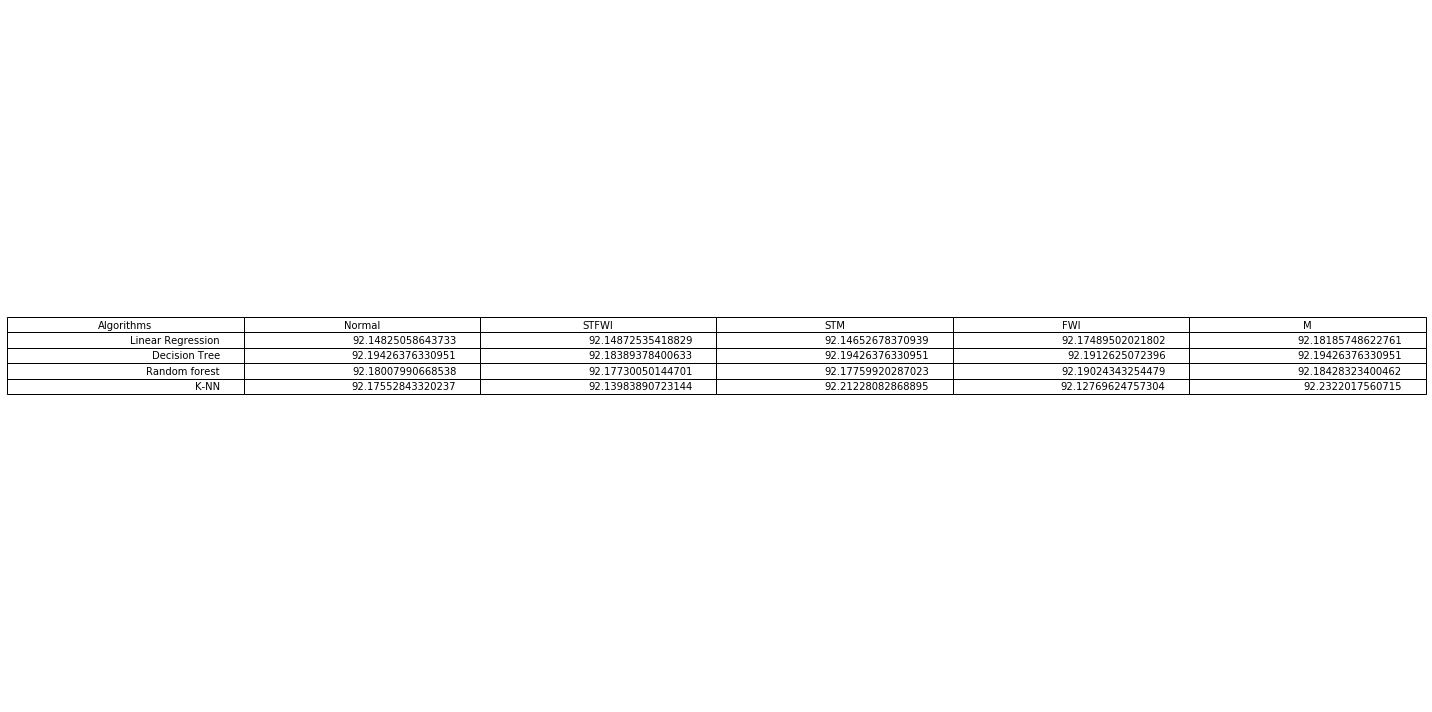

In [79]:
columns = [ 'Algorithms' ,'Normal', 'STFWI', 'STM', 'FWI', 'M']
values = [['Linear Regression', lr_RMSE, lr_RMSE_STFWI, lr_RMSE_STM, lr_RMSE_FWI, lr_RMSE_M],
         ['Decision Tree', dt_RMSE, dt_RMSE_STFWI, dt_RMSE_STM, dt_RMSE_FWI, dt_RMSE_M],
         ['Random forest', rf_RMSE, rf_RMSE_STFWI, rf_RMSE_STM, rf_RMSE_FWI, rf_RMSE_M],
         #['SVR', svr_RMSE, svr_RMSE_STFWI, svr_RMSE_STM, svr_RMSE_FWI, svr_RMSE_M]
          ['K-NN', knn_RMSE, knn_RMSE_STFWI, knn_RMSE_STM, knn_RMSE_FWI, knn_RMSE_M]]
fig, ax = plt.subplots(figsize=(20,10))
#fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=values, colLabels=columns, loc='center')
fig.tight_layout()
plt.show()

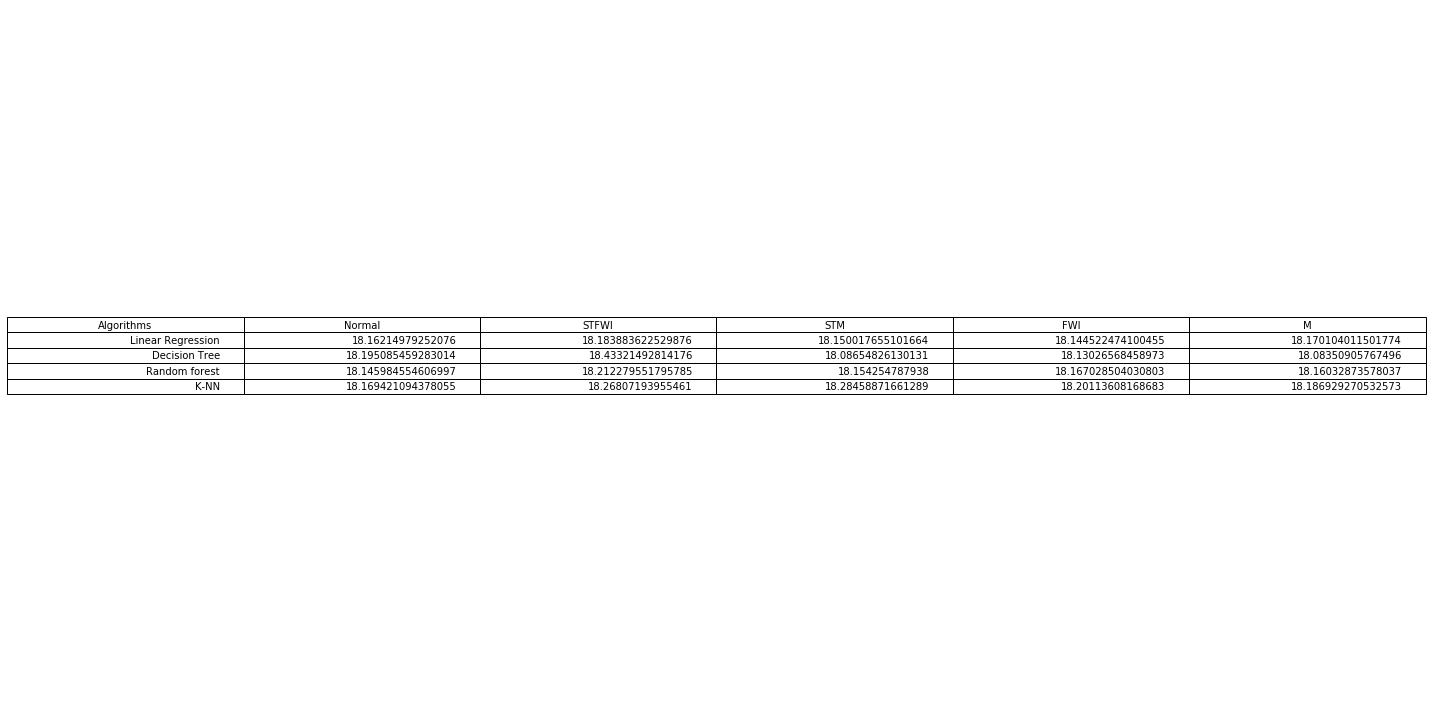

In [80]:
columns = [ 'Algorithms' ,'Normal', 'STFWI', 'STM', 'FWI', 'M']
values = [['Linear Regression', lr_pca_MAE, lr_pca_MAE_STFWI, lr_pca_MAE_STM, lr_pca_MAE_FWI, lr_pca_MAE_M],
         ['Decision Tree', dt_pca_MAE, dt_pca_MAE_STFWI, dt_pca_MAE_STM, dt_pca_MAE_FWI, dt_pca_MAE_M],
         ['Random forest', rf_pca_MAE, rf_pca_MAE_STFWI, rf_pca_MAE_STM, rf_pca_MAE_FWI, rf_pca_MAE_M],
         #['SVR', svr_pca_MAE, svr_pca_MAE_STFWI, svr_pca_MAE_STM, svr_pca_MAE_FWI, svr_pca_MAE_M]
          ['K-NN', knn_pca_MAE, knn_pca_MAE_STFWI, knn_pca_MAE_STM, knn_pca_MAE_FWI, knn_pca_MAE_M]]
fig, ax = plt.subplots(figsize=(20,10))
#fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=values, colLabels=columns, loc='center')
fig.tight_layout()
plt.show()

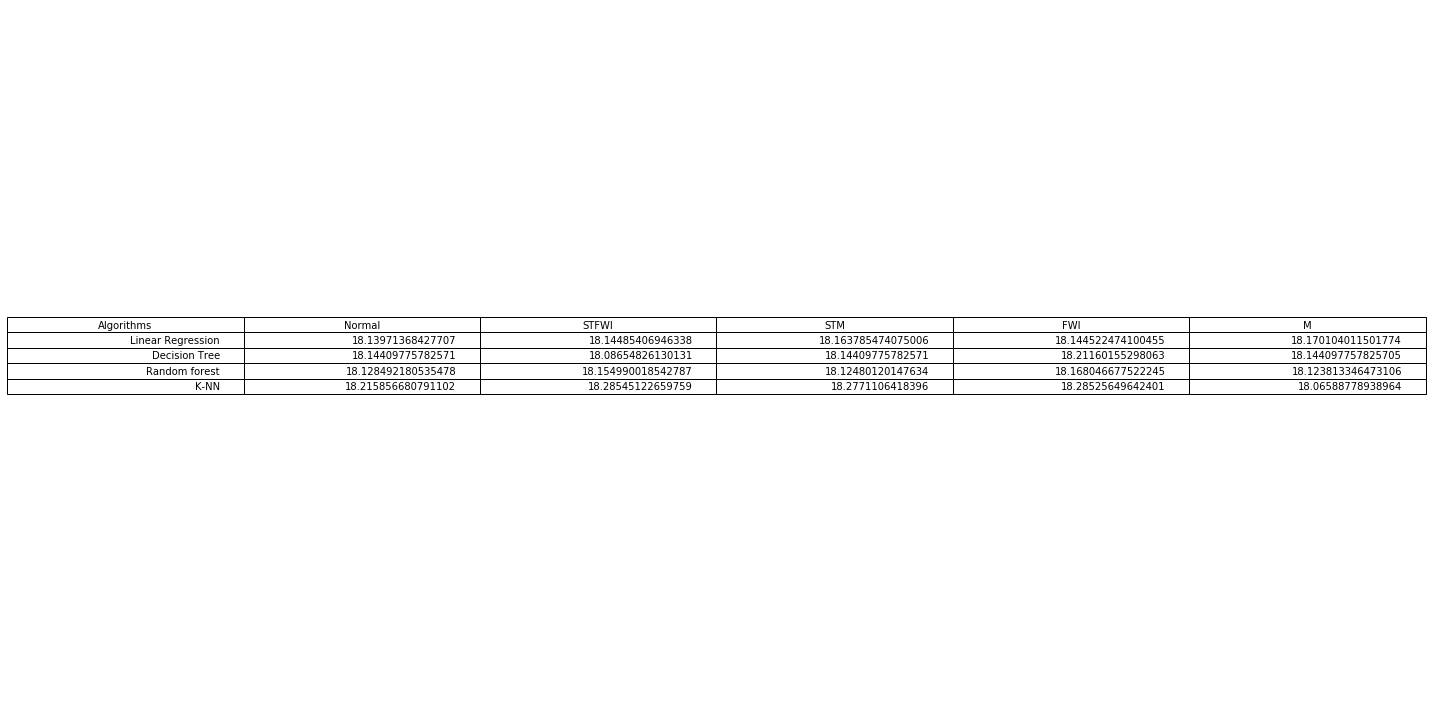

In [81]:
columns = [ 'Algorithms' ,'Normal', 'STFWI', 'STM', 'FWI', 'M']
values = [['Linear Regression', lr_MAE, lr_MAE_STFWI, lr_MAE_STM, lr_MAE_FWI, lr_MAE_M],
         ['Decision Tree', dt_MAE, dt_MAE_STFWI, dt_MAE_STM, dt_MAE_FWI, dt_MAE_M],
         ['Random forest', rf_MAE, rf_MAE_STFWI, rf_MAE_STM, rf_MAE_FWI, rf_MAE_M],
         #['SVR', svr_MAE, svr_MAE_STFWI, svr_MAE_STM, svr_MAE_FWI, svr_MAE_M]
          ['K-NN', knn_MAE, knn_MAE_STFWI, knn_MAE_STM, knn_MAE_FWI, knn_MAE_M]]
fig, ax = plt.subplots(figsize=(20,10))
#fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=values, colLabels=columns, loc='center')
fig.tight_layout()
plt.show()